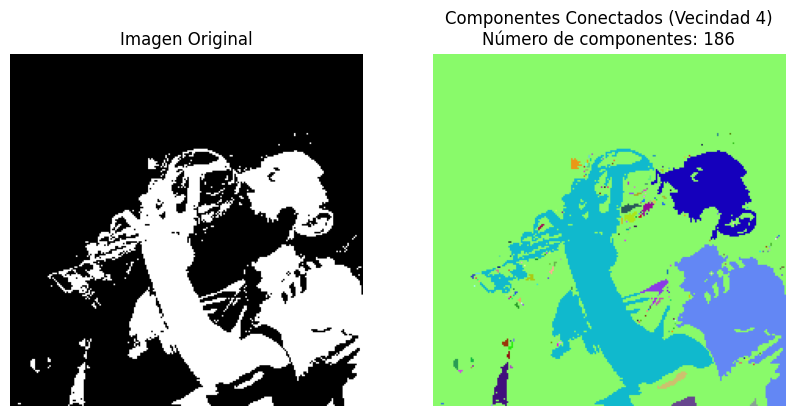

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

threshold = 100
binary_matrix = []

with open('info_GOAT.txt', 'r') as f_in, open('info_GOAT_bin.txt', 'w') as f_out:
    for line in f_in:
        row = [int(x) for x in line.split()]
        binary_row = [1 if x > threshold else 0 for x in row]

        binary_matrix.append(binary_row)
        f_out.write(' '.join(str(x) for x in binary_row) + '\n')

    f_in.close()
    f_out.close()

def dfs_4(matrix, labels, i, j, current_label):
    if i < 0 or i >= len(matrix) or j < 0 or j >= len(matrix[0]) or matrix[i][j] == 0 or labels[i][j] != 0:
        return

    labels[i][j] = current_label

    dfs_4(matrix, labels, i + 1, j, current_label)
    dfs_4(matrix, labels, i - 1, j, current_label)
    dfs_4(matrix, labels, i, j + 1, current_label)
    dfs_4(matrix, labels, i, j - 1, current_label)

def count_connected_components_4_with_labels(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = np.zeros_like(matrix)
    current_label = 0

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and labels[i][j] == 0:
                current_label += 1
                dfs_4(matrix, labels, i, j, current_label)

    return labels, current_label

# Llamadas a las funciones
labels_4, count_4 = count_connected_components_4_with_labels(binary_matrix)

# Colores aleatorios para resaltar los componentes conectados
colors_4 = np.random.randint(0, 255, size=(count_4 + 1, 3), dtype=np.uint8)
result_4 = colors_4[labels_4]

# Convierte la imagen a formato RGB para visualización
result_4_rgb = cv2.cvtColor(result_4, cv2.COLOR_BGR2RGB)

# Muestra la imagen original y la imagen con componentes conectados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_matrix, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_4_rgb)
plt.title(f'Componentes Conectados (Vecindad 4)\nNúmero de componentes: {count_4}')
plt.axis('off')
plt.show()

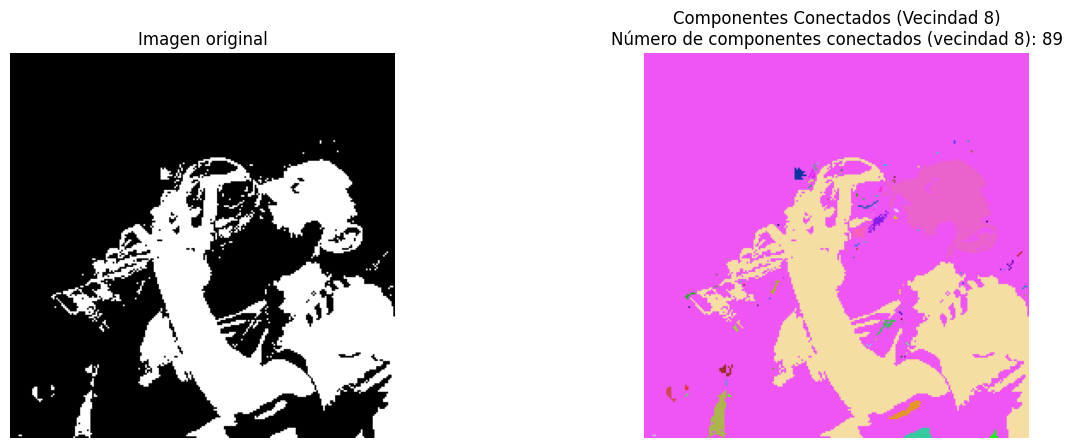

In [90]:
def dfs_8_iterative(matrix, labels, i, j, current_label):
    stack = [(i, j)]

    while stack:
        current_i, current_j = stack.pop()

        if 0 <= current_i < len(matrix) and 0 <= current_j < len(matrix[0]) and matrix[current_i][current_j] == 1 and labels[current_i][current_j] == 0:
            labels[current_i][current_j] = current_label

            # Agrega vecinos a la pila (vecindad 8)
            stack.append((current_i + 1, current_j))
            stack.append((current_i - 1, current_j))
            stack.append((current_i, current_j + 1))
            stack.append((current_i, current_j - 1))
            stack.append((current_i + 1, current_j + 1))
            stack.append((current_i - 1, current_j - 1))
            stack.append((current_i + 1, current_j - 1))
            stack.append((current_i - 1, current_j + 1))

def count_connected_components_8_iterative(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = np.zeros_like(matrix)
    current_label = 0

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and labels[i][j] == 0:
                current_label += 1
                dfs_8_iterative(matrix, labels, i, j, current_label)

    return labels, current_label

# Llamadas a las funciones
labels_8, count_8 = count_connected_components_8_iterative(binary_matrix)

# Colores aleatorios para resaltar los componentes conectados
colors_8 = np.random.randint(0, 255, size=(count_8 + 1, 3), dtype=np.uint8)
result_8 = colors_8[labels_8]
result_8_rgb = cv2.cvtColor(result_8, cv2.COLOR_BGR2RGB)

# Muestra la imagen original y la imagen con componentes conectados
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_matrix, cmap='gray')
plt.title(f'Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_8_rgb)
plt.title(f'Componentes Conectados (Vecindad 8)\nNúmero de componentes conectados (vecindad 8): {count_8}')
plt.axis('off')

plt.show()

C:\Users\velez\AppData\Local\Temp\ipykernel_15836\3984534050.py:20: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[current_i][current_j] = current_label
C:\Users\velez\AppData\Local\Temp\ipykernel_15836\3984534050.py:20: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[current_i][current_j] = current_label
C:\Users\velez\AppData\Local\Temp\ipykernel_15836\3984534050.py:20: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 wil

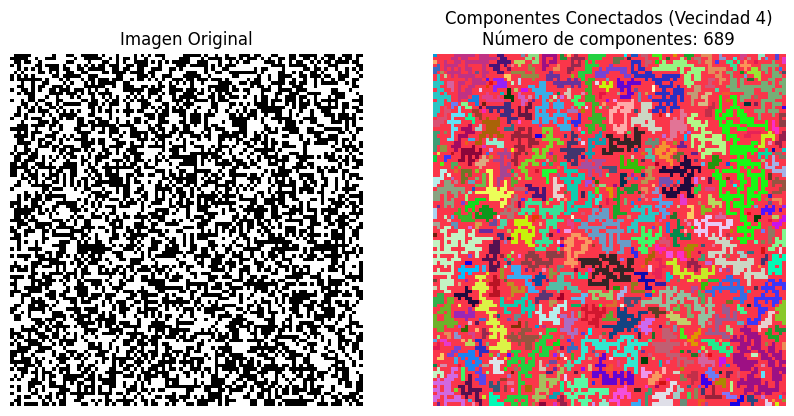

In [9]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
# Crear una imagen binaria aleatoria de tamaño 100x100
binary_matrix = np.random.randint(0, 2, size=(100, 100), dtype=np.uint8)

def dfs_4_iterative(matrix, labels, i, j, current_label):
    stack = [(i, j)]

    while stack:
        current_i, current_j = stack.pop()

        if (
            0 <= current_i < len(matrix)
            and 0 <= current_j < len(matrix[0])
            and matrix[current_i][current_j] == 1
            and labels[current_i][current_j] == 0
        ):
            labels[current_i][current_j] = current_label

            # Agrega vecinos a la pila (vecindad 4)
            stack.append((current_i + 1, current_j))
            stack.append((current_i - 1, current_j))
            stack.append((current_i, current_j + 1))
            stack.append((current_i, current_j - 1))

# Actualiza la función count_connected_components_4 para utilizar la versión iterativa
def count_connected_components_4_iterative(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = np.zeros_like(matrix)
    current_label = 0

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and labels[i][j] == 0:
                current_label += 1
                dfs_4_iterative(matrix, labels, i, j, current_label)

    return labels, current_label

# Llamadas a las funciones
labels_4, count_4 = count_connected_components_4_iterative(binary_matrix)

# Colores aleatorios para resaltar los componentes conectados
colors_4 = np.random.randint(0, 255, size=(count_4 + 1, 3), dtype=np.uint8)
result_4 = colors_4[labels_4]
result_4_rgb = cv2.cvtColor(result_4, cv2.COLOR_BGR2RGB)

# Muestra la imagen original y la imagen con componentes conectados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_matrix, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_4_rgb)
plt.title(f'Componentes Conectados (Vecindad 4)\nNúmero de componentes: {count_4}')
plt.axis('off')

plt.show()
#hola


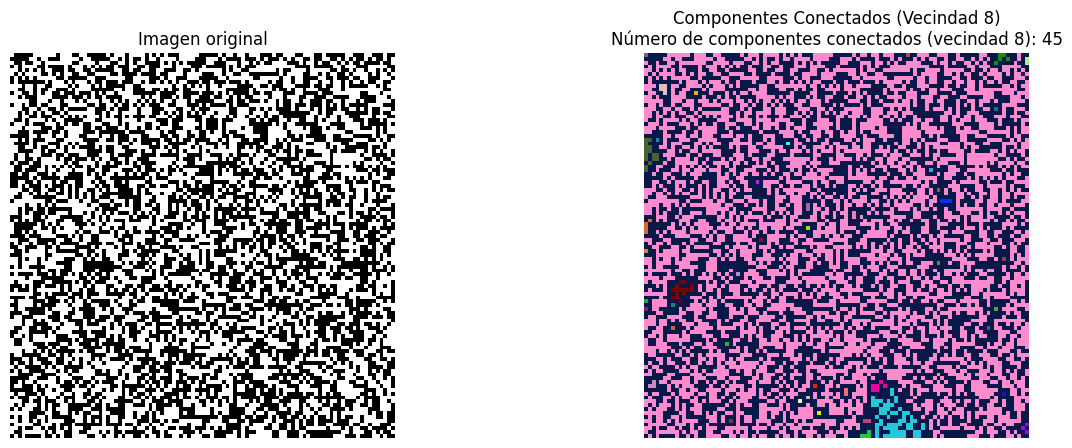

In [10]:
def dfs_8_iterative(matrix, labels, i, j, current_label):
    stack = [(i, j)]

    while stack:
        current_i, current_j = stack.pop()

        if (
            0 <= current_i < len(matrix)
            and 0 <= current_j < len(matrix[0])
            and matrix[current_i][current_j] == 1
            and labels[current_i][current_j] == 0
        ):
            labels[current_i][current_j] = current_label

            # Agrega vecinos a la pila (vecindad 8)
            stack.append((current_i + 1, current_j))
            stack.append((current_i - 1, current_j))
            stack.append((current_i, current_j + 1))
            stack.append((current_i, current_j - 1))
            stack.append((current_i + 1, current_j + 1))
            stack.append((current_i - 1, current_j - 1))
            stack.append((current_i + 1, current_j - 1))
            stack.append((current_i - 1, current_j + 1))

# Actualiza la función count_connected_components_8 para utilizar la versión iterativa
def count_connected_components_8_iterative(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = np.zeros_like(matrix)
    current_label = 0

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and labels[i][j] == 0:
                current_label += 1
                dfs_8_iterative(matrix, labels, i, j, current_label)

    return labels, current_label

# Llamadas a las funciones
labels_8, count_8 = count_connected_components_8_iterative(binary_matrix)

# Colores aleatorios para resaltar los componentes conectados
colors_8 = np.random.randint(0, 255, size=(count_8 + 1, 3), dtype=np.uint8)
result_8 = colors_8[labels_8]
result_8_rgb = cv2.cvtColor(result_8, cv2.COLOR_BGR2RGB)

# Muestra la imagen original y la imagen con componentes conectados
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_matrix, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_8_rgb)
plt.title(f'Componentes Conectados (Vecindad 8)\nNúmero de componentes conectados (vecindad 8): {count_8}')
plt.axis('off')

plt.show()